In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Load sorted train session

In [3]:
## load sorted session
tr_sessions = pd.read_csv('./train_sessions_sorted.csv')

# Plot session length of each sessions

### How sessions length is distributed?

AttributeError: 'DataFrame' object has no attribute 'to_list'

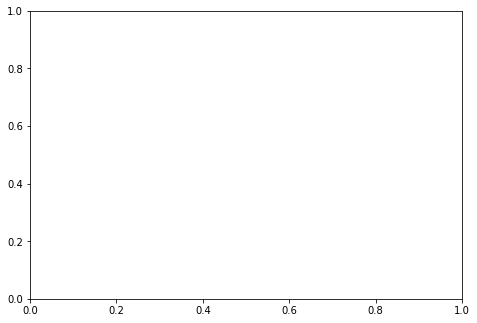

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = []
y = []

session_id = tr_sessions['session_id'].unique()
for sid in session_id:
  x.append(sid)
  length = len(tr_sessions.loc[tr_sessions['session_id'] == sid].to_list())
  y.append(length)

ax.bar(x,y)

In [ ]:
with open('./train.txt', 'r') as f:
  train = f.readlines()
  print(len(train))

### How much the explored items are included in total purchases (exploration affect on purchase?)
### How is the index distributed which corresponds to purchased items?

In [ ]:
x=[]
y_id=[]
y_len = []
fig = plt.figure()
width = 0.35
ax = fig.add_axes([0,0,1,1])
cnt = 0

for i,session in enumerate(train):
  x.append(i)
  session = session.split(',')
  explored = list(map(lambda x: int(x.strip()) ,session[:-1]))
  purchased = int(session[-1].strip())
  print(explored, purchased)
  
  # print(len(explored), purchased)
  # find index
  if purchased in explored:
    cnt +=1
  
cnt

# Item label distribution? (category id, value id)

In [5]:
item_feat = pd.read_csv('./item_features.csv')

print(item_feat.head(), item_feat.shape)
category = item_feat['feature_category_id'].unique()
print(len(category))
value = item_feat['feature_value_id'].unique()
print(len(value))

   item_id  feature_category_id  feature_value_id
0        2                   56               365
1        2                   62               801
2        2                   68               351
3        2                   33               802
4        2                   72                75 (471751, 3)
73
890


In [21]:
max(ids)

28143

In [17]:
## Generate feature txt file
ids = item_feat['item_id'].unique()
print(len(ids))

with open('./item_features.txt', 'w') as f:
  for id in ids:
    sess = item_feat.loc[item_feat['item_id'] == id]
    # print(sess)
    # li = sess.apply(lambda x: str(x[1]) + ":" + str(x[2]), axis=0)
    cate = sess['feature_category_id']
    value = sess['feature_value_id']
    assert len(cate) == len(value), print("different length {} {}".format(len(cate), len(value)))
    assert len(value) > 0
    # print(value)
    li = [str(x)+":"+str(value.iloc[i]) for i,x in enumerate(cate)]
    # print(li)
    string = ",".join(li) + '\n'
    f.write(string)

### Item feature statistics

In [19]:
def print_statistics(fn):
  with open(fn, 'r') as f:
    session = f.readlines()

  len(session)
  session = [s.split(',') for s in session]
  li = list(map(len, session))
  print("average length ", sum(li)/len(li))
  print("maximum length", max(li))

  larger = sum(map((lambda x: x>20), li))
  print("num feat length larger than 20: ", larger)
  smaller = sum(map((lambda x: x<=20), li))
  print("num feat length smaller or equal to 20: ", smaller)

print_statistics('./item_features.txt')


average length  19.912667257608373
maximum length 33
session length larger than 20:  10485
session length smaller or equal to 20:  13206
